In [136]:
# Javaria Ahmad
# 3001059
# The goal of this project is to build regression model to find scores of each team using other columns as features.
# References: Pluralsight.com

# imports

import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing


import datetime
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

In [137]:
# Load into dataframes

df_matches=pd.read_csv('../data/raw/spi_matches.csv')

df_matches.sample(5)

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
30111,2020-02-23,1864,Portuguese Liga,Braga,Vitoria Setubal,60.76,39.99,0.6550,0.1112,0.2339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17709,2019-01-28,1844,French Ligue 2,Beziers AS,Paris FC,15.76,33.07,0.2308,0.3957,0.3735,...,57.9,29.9,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4011,2017-09-16,1856,Italy Serie B,Empoli,Ascoli,50.58,27.11,0.7249,0.0892,0.1859,...,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15575,2018-11-11,1874,Swedish Allsvenskan,GIF Sundsvall,Dalkurd FF,38.40,16.57,0.6501,0.1318,0.2181,...,0.0,58.1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6024,2017-11-22,1818,UEFA Champions League,Juventus,Barcelona,85.62,94.22,0.3176,0.4416,0.2408,...,12.2,12.2,0.0,0.0,0.6,0.51,1.27,1.04,0.0,0.0


In [138]:
# Replace missing values with NaN

df_matches = df_matches.replace('?', np.nan)

In [139]:
# Drop rows with NaN values

df_matches = df_matches.dropna()

In [140]:
# Finding the count of missing values

df_matches[df_matches.isnull().any(axis=1)].count()

date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

In [141]:
# Create two dataframes, one for team1 values and another for team2 values.
# Do not use unnecessary columns which have no bearing on the scores.

df_team1 = df_matches.copy()
df_team2 = df_matches.copy()

In [142]:
df_team1.drop(['date','league_id','league','team1','team2','spi2','prob2','probtie','proj_score2','importance2','score2','xg2','nsxg2','adj_score2','adj_score1'], 'columns', inplace=True)

df_team1.sample(5)


,spi1,prob1,proj_score1,importance1,score1,xg1,nsxg1
12808,62.29,0.4546,1.41,21.9,5.0,2.00,0.68
7535,59.84,0.1259,0.76,0.0,1.0,1.11,1.14
12046,33.13,0.3153,1.38,25.8,2.0,1.05,1.50
4421,64.41,0.4387,1.32,33.2,0.0,1.01,1.21
17380,39.59,0.5255,1.66,16.2,2.0,1.94,2.31


In [143]:
df_team2.drop(['date','league_id','league','team1','team2','spi1','prob1','probtie','proj_score1','importance1','score1','xg1','nsxg1','adj_score1','adj_score2'], 'columns', inplace=True)

df_team2.sample(5)

,spi2,prob2,proj_score2,importance2,score2,xg2,nsxg2
22177,28.71,0.3393,1.32,0.0,1.0,1.53,1.69
23718,55.11,0.3224,1.26,28.2,1.0,2.21,1.58
7305,49.67,0.0797,0.63,45.1,1.0,0.09,0.24
483,61.51,0.3268,1.21,24.8,1.0,0.70,1.18
859,69.08,0.3467,1.31,49.4,0.0,0.61,1.13


In [144]:
# All datatypes are numeric, so we are good.

df_team1.dtypes






spi1           float64
prob1          float64
proj_score1    float64
importance1    float64
score1         float64
xg1            float64
nsxg1          float64
dtype: object

In [145]:
# Checking correlations of different features in one of the datasets. The other datasets has the same correlations.

team1_corr = df_team1.corr()
team1_corr


,spi1,prob1,proj_score1,importance1,score1,xg1,nsxg1
spi1,1.000000,0.429591,0.458341,0.292949,0.153745,0.220852,0.264629
prob1,0.429591,1.000000,0.906652,0.268743,0.339267,0.422266,0.492431
proj_score1,0.458341,0.906652,1.000000,0.299477,0.354571,0.440769,0.517949
importance1,0.292949,0.268743,0.299477,1.000000,0.094644,0.115630,0.139413
score1,0.153745,0.339267,0.354571,0.094644,1.000000,0.565341,0.220421
xg1,0.220852,0.422266,0.440769,0.115630,0.565341,1.000000,0.554008
nsxg1,0.264629,0.492431,0.517949,0.139413,0.220421,0.554008,1.000000


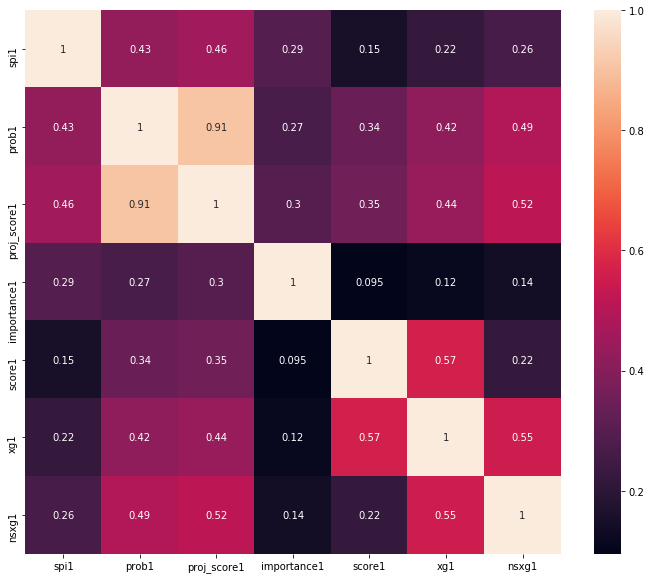

In [146]:
# Heatmap to visualize correlations

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(team1_corr, annot=True)

In [147]:
# Shuffle the datasets

df_team1 = df_team1.sample(frac=1).reset_index(drop=True)
df_team1.head(5)

,spi1,prob1,proj_score1,importance1,score1,xg1,nsxg1
0,31.78,0.2713,0.93,0.0,4.0,0.79,1.11
1,56.02,0.0982,0.91,4.3,0.0,1.28,0.95
2,62.15,0.4785,1.22,0.0,1.0,1.91,2.01
3,54.82,0.5485,1.46,48.1,1.0,2.10,1.82
4,71.51,0.4946,1.58,47.3,1.0,2.04,2.45


In [148]:

df_team2 = df_team2.sample(frac=1).reset_index(drop=True)
df_team2.head(5)

,spi2,prob2,proj_score2,importance2,score2,xg2,nsxg2
0,28.53,0.2489,1.37,21.1,1.0,1.09,1.19
1,60.33,0.4372,1.50,67.7,0.0,1.35,1.71
2,85.13,0.5579,1.73,55.9,1.0,1.11,1.13
3,54.27,0.2380,1.02,13.4,0.0,0.41,1.53
4,37.17,0.2611,0.95,0.0,2.0,1.27,1.33


In [149]:
# Saving the modified datasets into CSV files

df_team1.to_csv('../data/processed/team1.csv', index=False)
df_team2.to_csv('../data/processed/team2.csv', index=False)

In [150]:
# Performing linear regression (multiple features) for team1

from sklearn.model_selection import train_test_split
X = df_team1[['spi1','prob1','proj_score1','importance1','xg1','nsxg1']]
Y = df_team1['score1']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [151]:
# Normalize features that we pass to train the model

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [152]:
# Printing r2 score on the training data (team1)

from sklearn.metrics import r2_score
print('Training score: ', linear_model.score(x_train, y_train))

('Training score: ', 0.3674645118684501)


In [153]:
# Calculate coefficients for each predictor - Team1
# Negative values show inverse relation. Positive values show direct relation.

predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

nsxg1         -0.430775
spi1          -0.001734
importance1    0.000025
prob1          0.293807
proj_score1    0.553285
xg1            0.926451
dtype: float64


In [154]:
# Calculate r2 score of the test data

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

('Testing score: ', 0.3383376451795759)


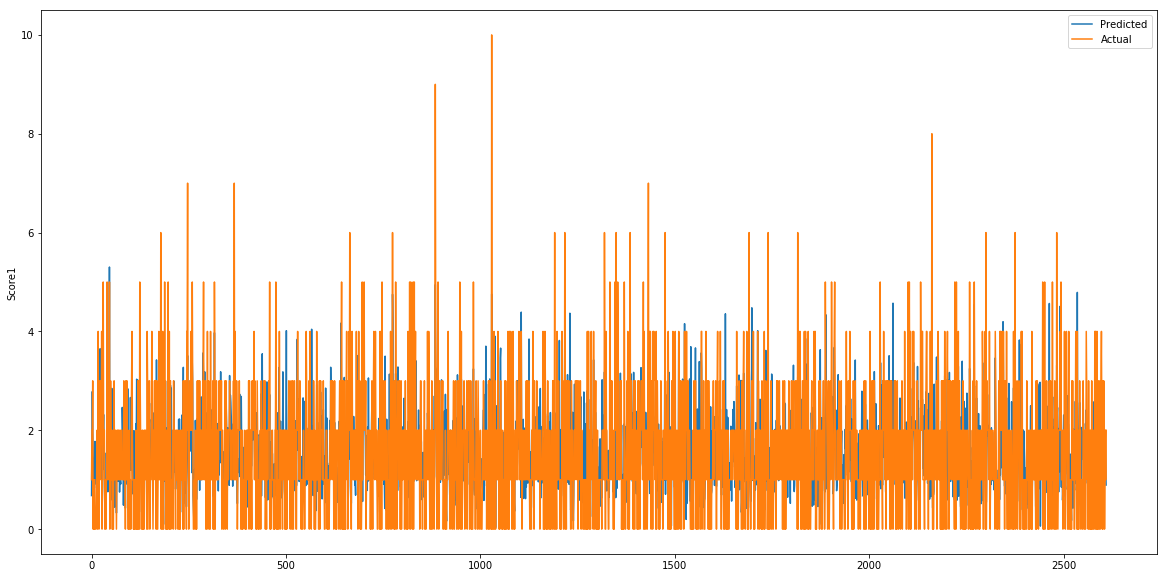

In [155]:
# Plotting predicted vs. actual values from the dataset - team1
# Orange are actual, blue are predicted.

plt.figure(figsize = (20,10))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Score1')
plt.legend()
plt.show()

In [156]:
# Now performing linear regression (multiple features) for team2

from sklearn.model_selection import train_test_split
X = df_team2[['spi2','prob2','proj_score2','importance2','xg2','nsxg2']]
Y = df_team2['score2']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [157]:
# Normalize features that we pass to train the model

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [158]:
# Printing r2 score on the training data (team2)

from sklearn.metrics import r2_score
print('Training score: ', linear_model.score(x_train, y_train))

('Training score: ', 0.3491914758779282)


In [159]:
# Calculate coefficients for each predictor - Team2
# Negative values show inverse relation. Positive values show direct relation.

predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

nsxg2         -0.335580
importance2   -0.000441
spi2           0.001057
prob2          0.262840
proj_score2    0.301290
xg2            0.948960
dtype: float64


In [160]:
# Calculate r2 score of the test data

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

('Testing score: ', 0.3526174221416688)


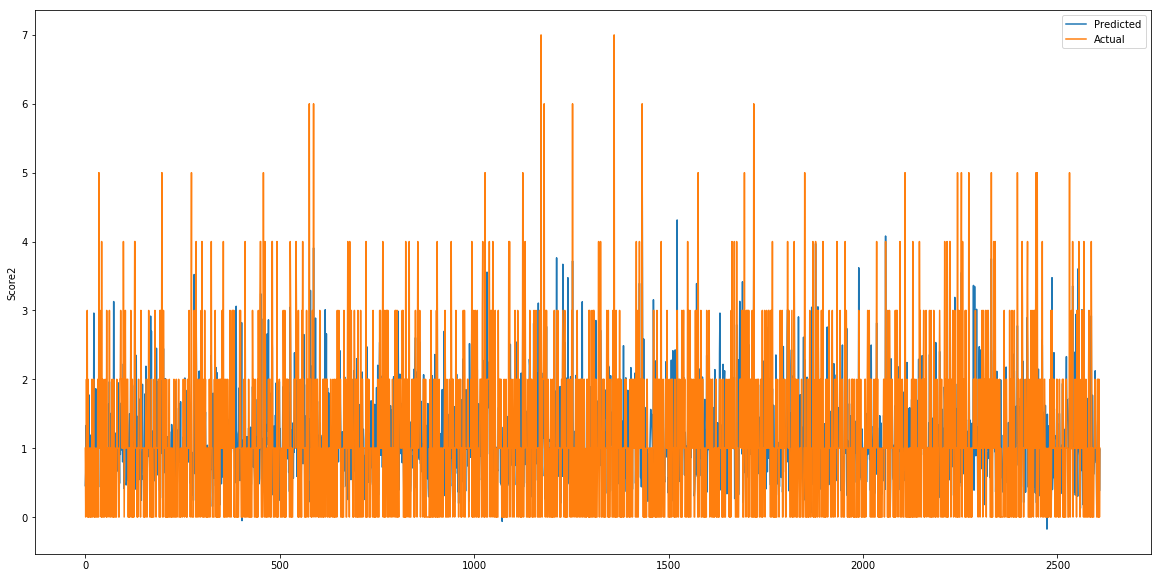

In [161]:
# Plotting predicted vs. actual values from the dataset - team2
# Orange are actual, blue are predicted.

plt.figure(figsize = (20,10))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Score2')
plt.legend()
plt.show()

In [162]:
# The r2 scores indicate that this model has somewhat nice score predicting power, though it is not excellent.